In [3]:
import os
import sys
import numpy
import json
import subprocess
import isambard_dev
import operator
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib notebook

# Backbone RMSD 

In [4]:
wd = '/projects/s21/ba13026/as69/output1'

In [2]:
def filter_XY(filename):
    lines = open(filename,'r').readlines()
    return [list(map(float,xy.split())) for xy in lines if (not "#" in xy) and (not "@" in xy)]

<IPython.core.display.Javascript object>


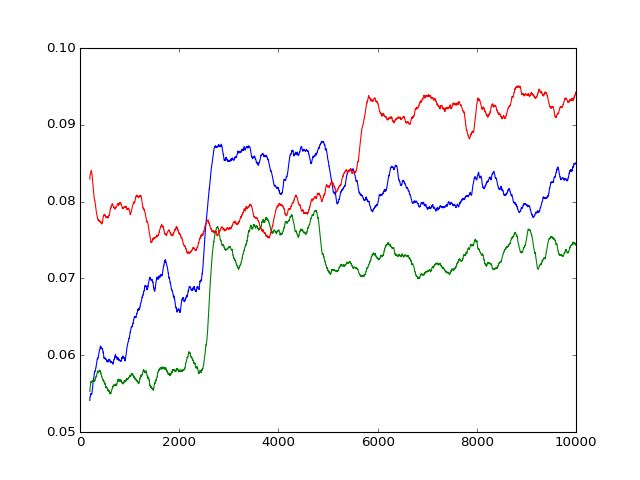

In [63]:
fig, ax = plt.subplots(1,1)

FILES = [
    'rmsd_md_-200mV_100ns.xvg',
    'rmsd_md_200mV_100ns.xvg',
    'bb_rmsd_100ns.xvg'
]

for f in FILES:
    filename = wd+'/complex/mdf/'+f
    data = filter_XY(filename)[:-2]
    df = pd.DataFrame(numpy.array(data), columns=['time','rmsd'])

    if len(data) > 10:
#         ax.plot(X,Y)
        df['rmsd'].rolling(200).mean().plot(ax=ax)
#         sns.timeseries.plot(x='time',y='rmsd', data=df, ax=ax)
#         sns.kdeplot(X,Y,ax=ax)
    
plt.show()

<IPython.core.display.Javascript object>


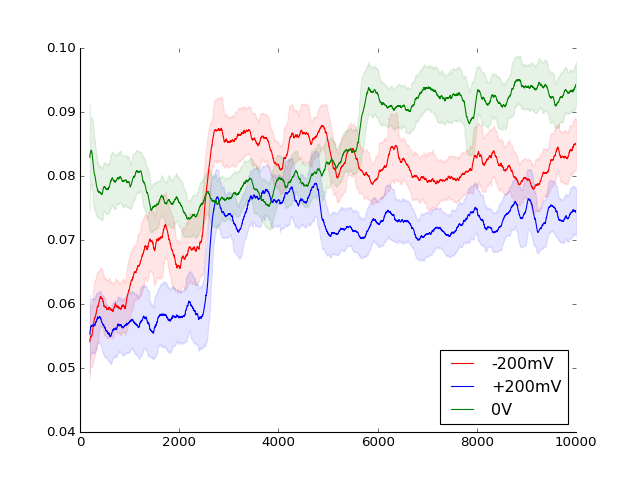

In [83]:
fig,ax = plt.subplots(1,1)

FILES = [
    'rmsd_md_-200mV_100ns.xvg',
    'rmsd_md_200mV_100ns.xvg',
    'bb_rmsd_100ns.xvg'
]

COLORS = [
    'red',
    'blue',
    'green'
]

LABELS = [
    '-200mV',
    '+200mV',
    '0V'
]

for i in range(len(FILES)):
    f = FILES[i]
    filename = wd+'/complex/mdf/'+f
    data = filter_XY(filename)[:-2]
    df = pd.DataFrame(numpy.array(data), columns=['time','rmsd'])
    
    winsize = 200
    m = df['rmsd'].rolling(winsize).agg(['mean', 'std'])
    ax = m['mean'].plot(color=COLORS[i],label=LABELS[i])
    ax.fill_between(
        m.index, 
        m['mean'] - m['std'], 
        m['mean'] + m['std'],
        color=COLORS[i],
        alpha=.1
    )


sns.despine()
plt.legend(loc='lower right')
